특성의 이름 
# car : 자동차 브랜드
# price : 자동차의 가격
# body : 자동차 타입
# mileage : 주행거리 (‘000 Km)
# engV : 엔진의 용량
# engType : 연료 타입
# registation : 자동차 등록 여부
# year : 제품의 연도
# model : 특정 모델 이름
# drive : 자동차 구동 방식


In [81]:
import pandas as pd
#데이터 불러오기
car = pd.read_csv('/content/car_ad.csv',encoding = 'ISO-8859-1')
car.head()


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [2]:
# car의 배열 확인
car.shape

(9576, 10)

In [3]:
# 자동차의 Vaule 확인
car['car'].value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
                ... 
ZX                 1
Other-Retro        1
Mercury            1
Maserati           1
Buick              1
Name: car, Length: 87, dtype: int64

In [4]:
# car 통계 정보 요약
car.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [5]:
# car의 결측치 확인
car.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [86]:
# 데이터 정확성을 위해 엔진의 용량의 결측치를 평균으로 대체
car['engV'] = car['engV'].fillna(car['engV'].mean())
car['engV'].head()

0    2.500000
1    1.800000
2    5.500000
3    1.800000
4    2.646344
Name: engV, dtype: float64

In [7]:
# 결측치가 제거된 것을 확인
car.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [8]:
# 다시한번 car의 배열 확인
car.shape

(9576, 10)

In [9]:
# car.corr()로 타겟과 여러 변수들의 상관계수 확인
car.corr()['price'].sort_values(ascending = False)

price      1.000000
year       0.370379
engV       0.049804
mileage   -0.312415
Name: price, dtype: float64

 평균 예측은  15633이고, 절대평균에러(MAE)는 12382.731930입니다.


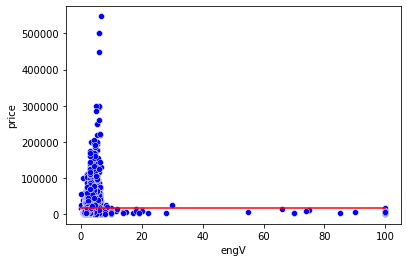

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# predict: 우리가 정한 기준모델인 평균으로 예측을 합니다
predict = car['price'].mean()
# 평균값으로 예측할 때 샘플 별 평균값과의 차이(error)를 저장합니다
errors = predict - car['price']
# mean_absolute_error(MAE), error에 절대값을 취한 후 평균을 계산합니다.
mean_absolute_error = errors.abs().mean()
mean_absolute_error

# 시각화
x = car['engV']
y = car['price']

sns.lineplot(x = x, y  = predict, color = 'red')
sns.scatterplot(x = x, y = y, color = 'blue')

print(f' 평균 예측은 {predict : .0f}이고, 절대평균에러(MAE)는 {mean_absolute_error:0f}입니다.')

In [87]:
from sklearn.linear_model import LinearRegression

# 예측모델 인스턴스를 만듭니다
model = LinearRegression()
# X 특성들의 테이블과, y 타겟 벡터를 만듭니다
# 엔진 용량에 따른 가격 예측
feature = ['engV']
target = ['price']
X_train = car[feature]
y_train = car[target]

# 모델을 학습(fit)합니다
model.fit(X_train,y_train)

# 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[4.5]]
y_pred = model.predict(X_test)
print(f'{X_test} 일 때 {float(y_pred):,.0f}')

[[4.5]] 일 때 16,018


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [83]:
from sklearn.linear_model import LinearRegression

# 예측모델 인스턴스를 만듭니다
model6 = LinearRegression()
# X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['year']
target = ['price']
X_train = car[feature]
y_train = car[target]

# 모델을 학습(fit)합니다
model6.fit(X_train,y_train)

# 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[2015]]
y_pred = model6.predict(X_test)
print(f'{X_test} 일 때 {float(y_pred):,.0f}')

[[2015]] 일 때 26,237


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [66]:
from sklearn.linear_model import LinearRegression

# 예측모델 인스턴스를 만듭니다
model7 = LinearRegression()
# X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['mileage']
target = ['price']
X_train = car[feature]
y_train = car[target]

# 모델을 학습(fit)합니다
model7.fit(X_train,y_train)

# 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[150]]
y_pred = model7.predict(X_test)
print(f'{X_test} 일 때 {float(y_pred):,.0f}')

[[150]] 일 때 14,783


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [12]:
#engV에 대한 회귀계수
# 전체 테스트 데이터를 모델을 통해 예측
X_test = [[x] for x in car['engV']]
y_pred =  model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [13]:
# 전체 예측값 
y_pred

array([[15602.98124848],
       [15457.87658271],
       [16224.85838749],
       ...,
       [15810.27362815],
       [15810.27362815],
       [15831.00286612]])

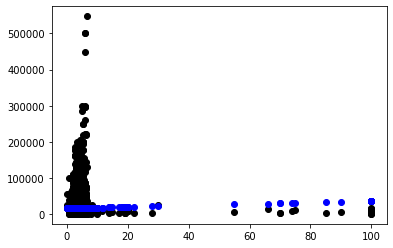

In [14]:
# train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train,y_train, color = 'black', linewidth = 1)

# test 데이터에 대한 예측을 파란색 점으로 나타낸 것
plt.scatter(X_test, y_pred, color = 'blue', linewidth = 1);

In [15]:
# 계수(coefficient)
model.coef_

# 절편(intercept)
model.intercept_

# 계수와 절편
print(f'계수(coef)는 {float(model.coef_):.0f}이고, 절편은(intercept)는 {float(model.intercept_):0f}이다')
print(f'따라서 1 engV에 따라 {float(model.coef_):.0f}증가한다')

계수(coef)는 207이고, 절편은(intercept)는 15084.750299이다
따라서 1 engV에 따라 207증가한다


In [16]:
from sklearn.linear_model import LinearRegression

# 예측모델 인스턴스를 만듭니다
model1 = LinearRegression()

In [17]:
# X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature1 = ['mileage']
target1 = ['price']
X1 = car[feature1]
y1 = car[target1]

# 모델을 학습(fit)합니다
model1.fit(X1,y1)

LinearRegression()

In [18]:
# 전체 테스트 데이터를 모델을 통해 예측
X_test2 = [[x] for x in car['mileage']]
y_pred2 = model1.predict(X_test2)
y_pred2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[21044.27600203],
       [13026.61150411],
       [15928.24246526],
       ...,
       [12492.10053758],
       [14782.8618227 ],
       [20815.19987352]])

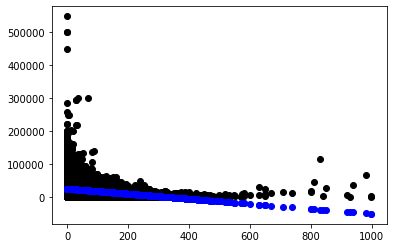

In [19]:
# train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X1, y1, color='black', linewidth=1)

# test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.scatter(X_test2, y_pred2, color='blue', linewidth=1);

In [20]:
# 계수(coefficient)
model1.coef_

# 절편(intercept)
model1.intercept_

# 계수와 절편
print(f'계수(coef)는 {float(model1.coef_):,.0f}이고, 절편은(intercept){float(model1.intercept_):,.0f}이다') 
print(f'따라서 1 mileage에 따라 {float(model1.coef_):.0f} 감소한다')
print('mileage가 증가할 수록 가격은 감소한다')

계수(coef)는 -76이고, 절편은(intercept)26,237이다
따라서 1 mileage에 따라 -76 감소한다
mileage가 증가할 수록 가격은 감소한다


In [21]:
from sklearn.linear_model import LinearRegression

# 예측모델 인스턴스를 만듭니다
model2 = LinearRegression()

In [22]:
# X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature2 = ['year']
target2 = ['price']
X2 = car[feature2]
y2 = car[target2]

# 모델을 학습(fit)합니다
model2.fit(X2,y2)

LinearRegression()

In [23]:
# 전체 테스트 데이터를 모델을 통해 예측
X_test3 = [[x] for x in car['year']]
y_pred3 = model2.predict(X_test3)
y_pred3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[19920.79457285],
       [21184.04438707],
       [17394.29494441],
       ...,
       [17394.29494441],
       [17394.29494441],
       [16131.04513019]])

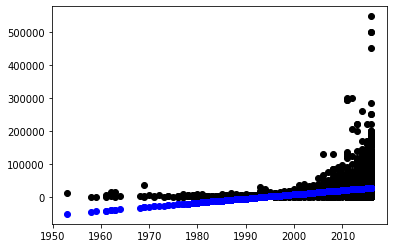

In [24]:
# train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X2, y2, color='black', linewidth=1)

# test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.scatter(X_test3, y_pred3, color='blue', linewidth=1);

In [25]:
# 계수(coefficient)
model2.coef_

# 절편(intercept)
model2.intercept_

# 계수와 절편
print(f'계수(coef)는 {float(model2.coef_):,.0f}이고, 절편은(intercept) {float(model2.intercept_):,.0f}이다')
print(f'따라서 연도에 따라 {float(model2.coef_):,.0f} 증가한다')
print('최신식일 수록 가격은 증가한다')

계수(coef)는 1,263이고, 절편은(intercept) -2,519,211이다
따라서 연도에 따라 1,263 증가한다
최신식일 수록 가격은 증가한다


In [26]:
# 다중선형회귀 
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

# test, train 데이터로 나누기
test = car[(car['year']>= 2000)]
train = car.drop(test.index)
train

# label 정의
target = 'price'
y_train = train[target]
y_test = test[target]

# label 정의
features = ['engV','year']
X_train = train[features]
X_test = test[features]

# 모델 학습
model3.fit(X_train,y_train)


LinearRegression()

In [27]:
test.shape , train.shape

((8282, 10), (1294, 10))

In [28]:
# 회귀식을 만들어 봅시다
b0 = model3.intercept_
b1,b2 = model3.coef_
print(f'절편은 b0: {b0:.0f}, engV 계수는 b1:{b1:.3f},  year 계수는 b2:{b2:.3f}')

절편은 b0: -215015, engV 계수는 b1:3.413,  year 계수는 b2:109.678


In [32]:
#훈련 에러
y_pred3 = model3.predict(X_train)
mae2 = mean_absolute_error(y_train,y_pred3)
print(f'훈련 에러(mae): {mae2:.0f}')

훈련 에러(mae): 1737


In [31]:
#테스트 에러
y_pred3 = model3.predict(X_test)
mae3 = mean_absolute_error(y_test,y_pred3)
print(f'테스트 에러(mae): {mae3:.0f}')

테스트 에러(mae): 12947


In [30]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#MSE (Mean Squared Error) 
#MAE (Mean absolute error)
#RMSE (Root Mean Squared Error)
#R-squared (Coefficient of determination)
y_pred3 = model3.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred3)
MSE = mean_squared_error(y_test, y_pred3)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred3)
print(f'MAE : {MAE:.1f}, MSE : {MSE:.1f}, RMSE : {RMSE:.1f}, R2 : {R2:.1f}')

MAE : 12947.1, MSE : 784279332.1, RMSE : 28005.0, R2 : -0.2


In [33]:
# 다중선형회귀 
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()

# test, train 데이터로 나누기
test = car[(car['year']>= 2000)]
train = car.drop(test.index)
train

# label 정의
target = 'price'
y_train = train[target]
y_test = test[target]

# label 정의
features = ['engV','mileage']
X_train = train[features]
X_test = test[features]

# 모델 학습
model4.fit(X_train,y_train)

LinearRegression()

In [34]:
# 회귀식을 만들어 봅시다
b0 = model4.intercept_
b1,b2 = model4.coef_
print(f'절편은 b0: {b0:.0f}, engV 계수는 b1:{b1:.2f},  year 계수는 b2:{b2:.2f}')

절편은 b0: 2548, engV 계수는 b1:-3.49,  year 계수는 b2:4.58


In [39]:
#훈련 에러
y_pred4 = model4.predict(X_train)
mae2 = mean_absolute_error(y_train,y_pred4)
print(f'훈련 에러(mae): {mae2:.0f}')

훈련 에러(mae): 1796


In [38]:
#테스트 에러
y_pred4 = model4.predict(X_test)
mae3 = mean_absolute_error(y_test,y_pred4)
print(f'테스트 에러(mae): {mae3:.1f}')

테스트 에러(mae): 14670.7


In [37]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#MSE (Mean Squared Error) 
#MAE (Mean absolute error)
#RMSE (Root Mean Squared Error)
#R-squared (Coefficient of determination)
y_pred4 = model4.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred4)
MSE = mean_squared_error(y_test, y_pred4)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred4)
print(f'MAE : {MAE:.1f}, MSE : {MSE:.1f}, RMSE : {RMSE:.1f}, R2 : {R2:.1f}')

MAE : 14670.7, MSE : 858328628.8, RMSE : 29297.2, R2 : -0.3


In [40]:
# 다중선형회귀 
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

# test, train 데이터로 나누기
test = car[(car['year']>= 2000)]
train = car.drop(test.index)
train

# label 정의
target = 'price'
y_train = train[target]
y_test = test[target]

# label 정의
features = ['year','mileage']
X_train = train[features]
X_test = test[features]

# 모델 학습
model5.fit(X_train,y_train)

LinearRegression()

In [41]:
# 회귀식을 만들어 봅시다
b0 = model5.intercept_
b1,b2 = model5.coef_
print(f'절편은 b0: {b0:.0f}, year 계수는 b1:{b1:.2f},  mileage 계수는 b2:{b2:.2f}')

절편은 b0: -170856, year 계수는 b1:87.17,  mileage 계수는 b2:3.18


In [44]:
#훈련 에러
y_pred5 = model5.predict(X_train)
mae2 = mean_absolute_error(y_train,y_pred5)
print(f'훈련 에러(mae): {mae2:.0f}')

훈련 에러(mae): 1700


In [43]:
#테스트 에러
y_pred5 = model5.predict(X_test)
mae3 = mean_absolute_error(y_test,y_pred5)
print(f'테스트 에러(mae): {mae3:.0f}')

테스트 에러(mae): 13435


In [42]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#MSE (Mean Squared Error) 
#MAE (Mean absolute error)
#RMSE (Root Mean Squared Error)
#R-squared (Coefficient of determination)
y_pred5 = model5.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred5)
MSE = mean_squared_error(y_test, y_pred5)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred5)

print(f'MAE : {MAE:.1f}, MSE : {MSE:.1f}, RMSE : {RMSE:.1f}, R2 : {R2:.1f}')

MAE : 13434.9, MSE : 807106442.8, RMSE : 28409.6, R2 : -0.3


In [ ]:
#!pip install category_encoders

In [45]:
from category_encoders import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split

# 원핫 인코딩
train, test = train_test_split(car, train_size=0.8, test_size=0.2, random_state=2)
encoder = OneHotEncoder(use_cat_names = True)
train = encoder.fit_transform(train)
test = encoder.transform(test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [46]:
train.shape, test.shape

((7660, 937), (1916, 937))

In [47]:
from sklearn.feature_selection import f_regression, SelectKBest
# 타겟 설정
target = 'price'

# X,y train, test 데이터로 나눔 
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [48]:
# selctor 정의합니다.
selector = SelectKBest(score_func=f_regression, k=20)

# 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

# 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

X_train_selected.shape, X_test_selected.shape

((7660, 20), (1916, 20))

In [49]:
#특성들의 점수
data = pd.DataFrame(selector.scores_, selector.feature_names_in_)

data = data.sort_values(0, ascending = False)

feature = selector.feature_names_in_

selector.scores_
data

,0
drive_full,1265.496300
year,1160.365412
car_Bentley,975.344873
model_Bentayga,875.763911
drive_front,820.368185
...,...
model_Qashqai,0.000095
model_500 L,0.000084
model_523,0.000045
model_Dokker ïàññ.,0.000005
